In [163]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from eli5.sklearn import PermutationImportance
import eli5
import shap
from sklearn.feature_selection import RFE, RFECV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
train = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\5. SVM\\train.csv')

In [31]:
train

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In [32]:
target = pd.DataFrame(data = train['target'], columns=['target'])

In [33]:
target

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
245,1.0
246,0.0
247,0.0
248,1.0


In [41]:
target['target'].unique()

array([1., 0.])

In [42]:
target['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

In [34]:
features = pd.DataFrame(data=train.loc[:, '0':'299'])

In [35]:
features

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,-0.569,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,0.549,1.474,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,0.369,-0.173,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


In [37]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                    shuffle=True, random_state=123)

In [44]:
logitModel = LogisticRegression().fit(x_train, y_train.values.ravel())

In [45]:
yhat = logitModel.predict(x_train)

In [47]:
display(accuracy_score(y_train, yhat))
display(f1_score(y_train, yhat))
display(roc_auc_score(y_train, yhat))

1.0

1.0

1.0

In [48]:
yhat = logitModel.predict(x_test)
display(accuracy_score(y_test, yhat))
display(f1_score(y_test, yhat))
display(roc_auc_score(y_test, yhat))

0.76

0.4

0.6140350877192982

In [78]:
y_train = y_train.values.ravel()
logitModel = LogisticRegression(penalty='none').fit(x_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [65]:
perm = PermutationImportance(logitModel).fit(x_train, y_train)
eli5.show_weights(perm, top=50)

Weight,Feature
0.0010 ± 0.0040,x127
0 ± 0.0000,x147
0 ± 0.0000,x97
0 ± 0.0000,x96
0 ± 0.0000,x95
0 ± 0.0000,x94
0 ± 0.0000,x93
0 ± 0.0000,x92
0 ± 0.0000,x91
0 ± 0.0000,x90


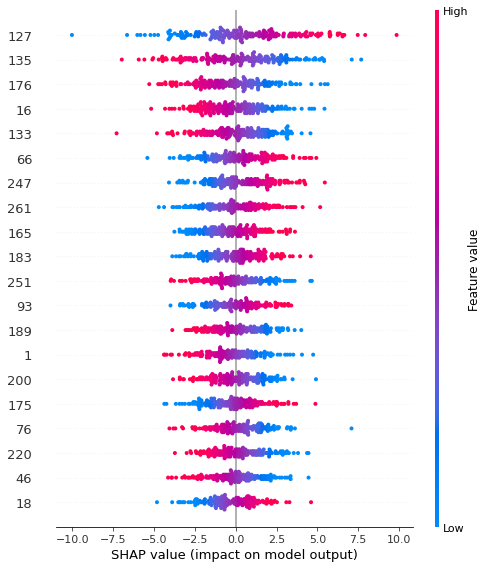

In [66]:
explainer = shap.LinearExplainer(logitModel, x_train)
shap_value = explainer.shap_values(x_train)
shap.summary_plot(shap_value, x_train)

In [68]:
selector = RFE(logitModel, n_features_to_select=20)
selector = selector.fit(x_train, y_train)
selector.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [72]:
x_train_selected = x_train.loc[:, selector.support_]
x_test_selected = x_test.loc[:, selector.support_]

In [74]:
x_train_selected

,3,16,66,113,127,133,135,144,145,159,165,175,176,178,180,189,200,213,220,244
130,0.341,-0.509,-1.144,0.335,-0.446,-0.430,-1.958,-0.619,1.091,-2.051,-0.956,0.721,0.434,1.078,0.393,-0.630,-1.232,0.010,-0.272,0.813
238,0.326,0.637,0.885,-0.390,-0.262,1.170,-0.428,-0.655,-1.736,-1.236,0.813,-0.678,0.087,-1.088,-0.895,-1.945,0.538,0.161,0.454,0.826
145,0.196,0.574,0.129,-0.240,0.442,0.536,-1.582,-1.532,0.205,-0.403,0.103,-0.695,0.041,0.408,0.590,2.170,-1.107,1.300,0.277,-2.223
136,-0.131,0.549,-0.430,0.875,-0.905,0.740,0.809,-1.661,0.922,-1.873,0.690,-0.876,0.326,0.771,-0.473,-0.003,0.739,-0.660,0.040,0.709
23,-1.691,0.749,1.074,1.220,0.373,0.604,-1.020,2.149,0.474,0.800,-1.824,1.701,1.767,-0.230,2.100,1.045,-1.998,-0.582,0.274,-0.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.098,-0.647,-0.177,0.515,-1.066,-0.542,1.119,0.239,-1.753,0.685,0.838,-0.005,1.400,0.287,-0.413,0.117,1.133,1.042,0.658,-0.840
220,0.203,0.046,0.001,0.954,0.464,0.949,-1.132,0.603,0.838,0.072,1.757,0.204,-0.728,-0.433,0.195,-1.306,0.977,0.611,-0.041,1.298
66,-0.276,1.679,1.418,-0.391,-0.476,-0.696,-1.620,-0.207,-0.455,0.245,-0.354,0.305,1.109,0.712,0.605,-2.220,-0.412,0.248,-0.395,-1.661
126,0.389,-0.532,1.276,0.161,0.446,-0.239,-2.057,0.544,0.363,0.643,0.428,-0.545,-0.517,0.104,-1.127,1.451,0.896,-0.055,-0.320,1.272


In [ ]:
x_test_selected

In [76]:
logitModel = LogisticRegression(penalty='none').fit(x_train_selected, y_train)

In [79]:
y_test = y_test.values.ravel()

In [80]:
yhat = logitModel.predict(x_train_selected)

In [81]:
display(accuracy_score(y_train, yhat))
display(f1_score(y_train, yhat))
display(roc_auc_score(y_train, yhat))

0.925

0.8623853211009175

0.9031347962382446

In [82]:
yhat = logitModel.predict(x_test_selected)
display(accuracy_score(y_test, yhat))
display(f1_score(y_test, yhat))
display(roc_auc_score(y_test, yhat))

0.68

0.4666666666666666

0.6469298245614035

In [85]:
svmModel = SVC(C=10, gamma=10).fit(x_train, y_train)

In [86]:
yhat = svmModel.predict(x_train)

In [87]:
display(accuracy_score(y_train, yhat))
display(f1_score(y_train, yhat))
display(roc_auc_score(y_train, yhat))

1.0

1.0

1.0

In [88]:
yhat = svmModel.predict(x_test)
display(accuracy_score(y_test, yhat))
display(f1_score(y_test, yhat))
display(roc_auc_score(y_test, yhat))

0.76

0.0

0.5

In [90]:
base_model = SVC(C=0.1, gamma=0.1)
scores = cross_val_score(base_model, x_train, y_train, cv=10, scoring='accuracy')
display(scores)
display(scores.mean())

array([0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75])

0.725

In [91]:
kfolds = KFold(n_splits=10, shuffle=True)
base_model = SVC(C=0.1, gamma=0.1)
scores = cross_val_score(base_model, x_train, y_train, cv=kfolds, scoring='accuracy')
display(scores)
display(scores.mean())

array([0.8 , 0.7 , 0.85, 0.55, 0.7 , 0.65, 0.75, 0.75, 0.65, 0.85])

0.725

In [92]:
folds = StratifiedKFold(n_splits=10, shuffle=True)
base_model = SVC(C=0.1, gamma=0.1)
scores = cross_val_score(base_model, x_train, y_train, cv=folds, scoring='accuracy')
display(scores)
display(scores.mean())

array([0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75])

0.725

In [93]:
folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
base_model=SVC(C=0.1, gamma=0.1)
scores = cross_val_score(base_model, x_train, y_train, cv=folds, scoring='accuracy')
display(scores)
display(scores.mean())

array([0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.7 ,
       0.7 , 0.7 , 0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.7 , 0.7 ,
       0.7 , 0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.7 , 0.7 , 0.7 , 0.7 ,
       0.7 , 0.75, 0.75, 0.75, 0.75, 0.75])

0.725

In [94]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
base_model = SVC()
search = GridSearchCV(base_model, param_grid=params, scoring='accuracy', cv=10)
results = search.fit(x_train, y_train)

In [95]:
display(results.best_params_)
display(results.best_score_)

{'C': 0.001, 'gamma': 0.001}

0.725

In [99]:
folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

In [100]:
svmModel = SVC().fit(x_train, y_train)
scores = cross_val_score(svmModel, x_train, y_train, cv=folds, scoring='roc_auc')
scores.mean()

0.6556190476190477

In [101]:
perm = PermutationImportance(svmModel, random_state=123).fit(x_train, y_train)

In [102]:
eli5.show_weights(perm)

Weight,Feature
0.0080 ± 0.0049,x189
0.0080 ± 0.0080,x95
0.0070 ± 0.0049,x97
0.0060 ± 0.0040,x244
0.0060 ± 0.0133,x127
0.0060 ± 0.0075,x204
0.0050 ± 0.0000,x206
0.0050 ± 0.0000,x292
0.0050 ± 0.0063,x265
0.0040 ± 0.0075,x187


In [105]:
selected_columns = eli5.formatters.as_dataframe.explain_weights_df(perm).loc[eli5.formatters.as_dataframe.explain_weights_df(perm)['weight']!=0]

In [109]:
selected_columns = eli5.formatters.as_dataframe.explain_weights_df(perm).loc[eli5.formatters.as_dataframe.explain_weights_df(perm)['weight']!=0]

In [123]:
selected_columns

,feature,weight,std
0,x95,0.008,0.004000
1,x189,0.008,0.002449
2,x97,0.007,0.002449
3,x244,0.006,0.002000
4,x204,0.006,0.003742
...,...,...,...
295,x136,-0.002,0.002449
296,x46,-0.002,0.002449
297,x79,-0.003,0.002449
298,x183,-0.004,0.002000


In [129]:
top_features = [i[1:] for i in selected_columns.feature if 'BIAS' not in i]

In [131]:
top_features = [i[1:] for i in selected_columns.feature if 'BIAS' not in i]

In [ ]:
top_features

In [133]:
x_train_selected = x_train[top_features]

In [134]:
x_train_selected

,95,189,97,244,204,127,206,265,292,276,...,63,3,199,271,42,136,46,79,183,76
130,-0.834,-0.630,2.202,0.813,0.238,-0.446,-0.590,0.746,0.577,-2.310,...,0.623,0.341,0.808,0.961,0.603,-2.010,0.204,1.149,0.274,0.094
238,0.115,-1.945,-0.246,0.826,0.517,-0.262,-0.338,0.111,-0.178,0.084,...,1.500,0.326,0.334,1.792,0.358,0.373,-1.603,-0.722,-0.565,-1.293
145,-0.572,2.170,-0.372,-2.223,0.284,0.442,0.557,-1.806,0.860,-0.344,...,-1.391,0.196,0.438,-0.980,0.983,0.635,0.510,0.363,0.204,-0.769
136,0.447,-0.003,0.912,0.709,1.732,-0.905,-0.574,0.730,0.283,-0.074,...,0.606,-0.131,0.211,0.465,-0.168,-0.535,1.473,-0.064,-1.600,2.460
23,-0.472,1.045,-0.121,-0.394,1.081,0.373,0.656,-2.733,-1.027,-1.811,...,0.535,-1.691,0.813,-0.140,0.155,-1.779,-0.036,-0.654,-1.689,-0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.355,0.117,0.345,-0.840,-1.726,-1.066,-0.812,-0.203,-0.508,0.672,...,-0.055,1.098,-0.660,1.474,-1.784,-0.027,1.765,-0.567,1.532,-0.369
220,1.068,-1.306,0.371,1.298,0.823,0.464,0.589,-1.071,0.517,-1.449,...,0.558,0.203,0.734,-0.256,0.640,0.684,-0.985,-0.029,-1.194,-0.893
66,-1.601,-2.220,-0.404,-1.661,-1.082,-0.476,1.584,1.778,-2.745,-2.770,...,1.033,-0.276,0.533,0.569,-0.069,0.350,1.361,-2.257,0.268,-0.038
126,1.546,1.451,1.471,1.272,1.929,0.446,-0.860,-0.052,-0.493,0.307,...,0.465,0.389,0.280,-0.916,0.069,-1.065,-0.129,1.359,-1.124,0.515


In [135]:
svmModel = SVC()

In [136]:
scores = cross_val_score(svmModel, x_train_selected, y_train, cv=folds, scoring='roc_auc')

In [137]:
scores.mean()

0.841552380952381

In [138]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [139]:
search = GridSearchCV(svmModel, param_grid=params, scoring='roc_auc', cv=folds)

In [140]:
results = search.fit(x_train_selected, y_train)

In [141]:
results.best_params_

{'C': 0.1, 'gamma': 0.01}

In [142]:
results.best_score_

0.8342857142857143

In [143]:
best_model = results.best_estimator_

In [144]:
best_model

SVC(C=0.1, gamma=0.01)

In [145]:
x_test_selected = x_test[top_features]

In [146]:
yhat = best_model.predict(x_test_selected)

In [147]:
roc_auc_score(y_test, yhat)

0.5

In [148]:
folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

In [149]:
svmModel = SVC().fit(x_train, y_train)
scores = cross_val_score(svmModel, x_train, y_train, cv=folds, scoring='roc_auc')
scores.mean()

0.6522

In [150]:
perm = PermutationImportance(svmModel, scoring='roc_auc', cv=folds).fit(x_train, y_train)

Pass classifier=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


In [151]:
eli5.show_weights(perm)

Weight,Feature
0.0467 ± 0.1226,x127
0.0361 ± 0.1253,x176
0.0200 ± 0.0969,x16
0.0182 ± 0.0775,x135
0.0149 ± 0.0836,x59
0.0136 ± 0.0657,x74
0.0121 ± 0.0726,x1
0.0116 ± 0.0818,x93
0.0110 ± 0.0697,x18
0.0108 ± 0.0627,x3


In [152]:
eli5.formatters.as_dataframe.explain_weights_df(perm)

,feature,weight,std
0,x127,0.046728,0.061295
1,x176,0.036137,0.062656
2,x16,0.019970,0.048439
3,x135,0.018154,0.038736
4,x59,0.014861,0.041784
...,...,...,...
295,x213,-0.005362,0.026044
296,x78,-0.005749,0.021409
297,x161,-0.005808,0.018028
298,x212,-0.006069,0.030211


In [155]:
selected_columns = eli5.formatters.as_dataframe.explain_weights_df(perm).loc[eli5.formatters.as_dataframe.explain_weights_df(perm)['weight']!=0]

In [156]:
selected_columns

,feature,weight,std
0,x127,0.046728,0.061295
1,x176,0.036137,0.062656
2,x16,0.019970,0.048439
3,x135,0.018154,0.038736
4,x59,0.014861,0.041784
...,...,...,...
295,x213,-0.005362,0.026044
296,x78,-0.005749,0.021409
297,x161,-0.005808,0.018028
298,x212,-0.006069,0.030211


In [ ]:
top_features = [i[1:] for i in selected_columns.feature if 'BIAS' not in i]
top_features

In [159]:
x_train_selected = x_train[top_features]

In [160]:
svmModel = SVC()
scores = cross_val_score(svmModel, x_train_selected, y_train, scoring='roc_auc', cv=folds)

In [161]:
scores.mean()

0.6386095238095237

In [162]:
pipeline = Pipeline([
    ('logit', LogisticRegression())
])
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
roc_auc_score(y_test, yhat)

0.6140350877192982

In [164]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression())
])

In [165]:
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
roc_auc_score(y_test, yhat)

0.6140350877192982

In [166]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logit', LogisticRegression())
])
folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=5)
scores = cross_val_score(pipeline, x_train, y_train, cv=folds, scoring='roc_auc')
scores.mean()

0.6605654761904762

In [167]:
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
roc_auc_score(y_test, yhat)

0.6140350877192982

In [168]:
folds = StratifiedKFold(n_splits=20, shuffle=True)

In [169]:
model = LogisticRegression(class_weight='balanced', solver='liblinear')
feature_selector = RFECV(model, min_features_to_select=20, cv=folds)
feature_selector = feature_selector.fit(x_train, y_train)

In [170]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logit', LogisticRegression(class_weight='balanced', solver='liblinear'))
])
x_train_selected = x_train.loc[:, feature_selector.support_]
x_test_selected = x_test.loc[:, feature_selector.support_]

scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=folds)
scores.mean()

0.6714285714285715

In [171]:
pipeline.fit(x_train_selected, y_train)
yhat = pipeline.predict(x_test_selected)
roc_auc_score(y_test, yhat)

0.618421052631579

In [185]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logit', LogisticRegression()),    
])
x_train_selected = x_train.loc[:, feature_selector.support_]
x_test_selected = x_test.loc[:, feature_selector.support_]

params = {
    'logit__penalty': ['l1', 'l2'],
    'logit__class_weight': ['balanced',None],
    'logit__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logit__solver': ['liblinear', 'sag', 'saga']
}
search = GridSearchCV(pipeline, param_grid=params, scoring='roc_auc', cv=kfolds)
results = search.fit(x_train_selected, y_train)
display(results.best_params_)
display(results.best_score_)

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' pe

{'logit__C': 1,
 'logit__class_weight': 'balanced',
 'logit__penalty': 'l2',
 'logit__solver': 'liblinear'}

1.0

In [193]:
pipeline.set_params(logit__C=1, logit__class_weight='balanced', logit__penalty='l2', logit__solver='liblinear')

Pipeline(steps=[('scale', StandardScaler()),
                ('logit',
                 LogisticRegression(C=1, class_weight='balanced',
                                    solver='liblinear'))])

In [195]:
pipeline.fit(x_train_selected, y_train)
yhat = pipeline.predict(x_test_selected)
roc_auc_score(y_test, yhat)

0.618421052631579